# 조직적 거래형(Coordinated Group Pattern)

In [1]:
#시각화 라이브러리 설치 및 한글 폰트 설정
!pip install koreanize-matplotlib --quiet
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
koreanize_matplotlib.koreanize()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/싱가포르/data/Trade.csv')
display(df.head())

,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493


In [4]:
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/싱가포르/data/'

# Dictionary to store DataFrames
data = {}

# List all files in the directory
if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0] # Use filename without extension as key
            print(f"Loading {filename}...")
            try:
                data[df_name] = pd.read_csv(filepath)
                print(f"Successfully loaded '{df_name}'. First 5 rows:")
                display(data[df_name].head())
                print("\n" + "-"*30 + "\n") # Separator for better readability
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {data_dir}")

# You can access your DataFrames like this:
# 예를 들어, 'my_data.csv'가 있다면 data['my_data']로 접근합니다.
# print(data.keys()) # To see all loaded DataFrame names

Loading Reward.csv...
Successfully loaded 'Reward'. First 5 rows:


,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Loading Funding.csv...
Successfully loaded 'Funding'. First 5 rows:


,account_id,ts,fee_rate,funding_fee
0,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
1,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
2,A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
3,A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
4,A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Loading Trade.csv...
Successfully loaded 'Trade'. First 5 rows:


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Loading IP.csv...
Successfully loaded 'IP'. First 5 rows:


,account_id,ip
0,A_1f97e16953,100.222.49.58
1,A_946b028740,18.96.95.89
2,A_78e950c1a2,13.120.90.27
3,A_0e72128b0d,190.83.18.146
4,A_0ad0445c5a,11.179.9.226



------------------------------

Loading Spec.csv...
Successfully loaded 'Spec'. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [5]:
for df_name, df in data.items():
    if df_name != 'Spec':
        if 'account_id' in df.columns:
            print(f"Setting 'account_id' as index for '{df_name}' DataFrame...")
            data[df_name] = df.set_index('account_id')
            print(f"Updated '{df_name}' DataFrame. First 5 rows with new index:")
            display(data[df_name].head())
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Warning: 'account_id' column not found in '{df_name}' DataFrame. Skipping index setting.")
    else:
        print(f"Skipping 'Spec' DataFrame as requested. First 5 rows:")
        display(data[df_name].head())
        print("\n" + "-"*30 + "\n")

Setting 'account_id' as index for 'Reward' DataFrame...
Updated 'Reward' DataFrame. First 5 rows with new index:


,ts,reward_amount
account_id,,
A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Setting 'account_id' as index for 'Funding' DataFrame...
Updated 'Funding' DataFrame. First 5 rows with new index:


,ts,fee_rate,funding_fee
account_id,,,
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Setting 'account_id' as index for 'Trade' DataFrame...
Updated 'Trade' DataFrame. First 5 rows with new index:


,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Setting 'account_id' as index for 'IP' DataFrame...
Updated 'IP' DataFrame. First 5 rows with new index:


,ip
account_id,
A_1f97e16953,100.222.49.58
A_946b028740,18.96.95.89
A_78e950c1a2,13.120.90.27
A_0e72128b0d,190.83.18.146
A_0ad0445c5a,11.179.9.226



------------------------------

Skipping 'Spec' DataFrame as requested. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [6]:
if 'Spec' in data and 'symbol' in data['Spec'].columns:
    print("Setting 'symbol' as index for 'Spec' DataFrame...")
    data['Spec'] = data['Spec'].set_index('symbol')
    print("Updated 'Spec' DataFrame. First 5 rows with new index:")
    display(data['Spec'].head())
else:
    print("Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.")

Setting 'symbol' as index for 'Spec' DataFrame...
Updated 'Spec' DataFrame. First 5 rows with new index:


,day,funding_interval,max_order_amount
symbol,,,
IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0


In [7]:
#Trade 데이터 준비
trade = data["Trade"].reset_index()
trade["ts"] = pd.to_datetime(trade["ts"])
trade = trade.sort_values("ts").reset_index(drop=True)


In [8]:
trade["ts_bucket"] = trade["ts"].dt.floor("5s") #5초 버킷

In [9]:
#동시 등장 계정 쌍(pair) 계산
from itertools import combinations
from collections import defaultdict

pair_count = defaultdict(int)

grouped = trade.groupby("ts_bucket")["account_id"].apply(list)

for accounts in grouped:
    accounts = list(set(accounts))
    if len(accounts) > 1:
        for a, b in combinations(accounts, 2):
            pair_count[(a, b)] += 1


In [10]:
#계정 쌍 상위 정렬
pair_df = pd.DataFrame([
    {"acc1": a, "acc2": b, "count": c}
    for (a, b), c in pair_count.items()
])

pair_df = pair_df.sort_values("count", ascending=False)
display(pair_df.head(20))


,acc1,acc2,count
404,A_f96ede8d34,A_d444580218,394
10,A_4943ad62b4,A_e27beda014,271
341,A_8413984c30,A_8860be39b3,46
6,A_c91db6cabf,A_55021b4ae2,26
11,A_dcd87c6c96,A_e7205c325a,22
63,A_7e27164ab6,A_0bfb0b4311,16
194,A_9788666227,A_64a414bc30,9
83,A_c462ca9c6b,A_0bfb0b4311,9
318,A_6b3a8b213d,A_1f97e16953,8
414,A_2db64f326b,A_f96ede8d34,8


In [11]:
#조직적 그룹 찾기
import networkx as nx

G = nx.Graph()
for _, row in pair_df.iterrows():
    if row["count"] >= 3:
        G.add_edge(row["acc1"], row["acc2"], weight=row["count"])

clusters = list(nx.connected_components(G))
clusters


[{'A_0ad0445c5a',
  'A_0bfb0b4311',
  'A_1a7c006b71',
  'A_26ffea8fd9',
  'A_27fd29fd55',
  'A_2ba62f7b20',
  'A_2db64f326b',
  'A_33849d660b',
  'A_3943c4c480',
  'A_3b4f58349f',
  'A_3cab2969e5',
  'A_4081f88bb0',
  'A_40cfe40ac2',
  'A_4943ad62b4',
  'A_507a86d368',
  'A_522c68dd44',
  'A_59b90616d6',
  'A_5cd5d675fd',
  'A_60a63690ae',
  'A_64a414bc30',
  'A_68f6513965',
  'A_6960c2ee08',
  'A_78e950c1a2',
  'A_7e27164ab6',
  'A_89cf7b96c2',
  'A_9366ce5043',
  'A_9788666227',
  'A_9a5e1e7fac',
  'A_ace0a74506',
  'A_ae270b7bf6',
  'A_c462ca9c6b',
  'A_c668740478',
  'A_cab220ef3c',
  'A_cf3fcea289',
  'A_d444580218',
  'A_e27beda014',
  'A_e8e9d04acc',
  'A_ebdb869fd3',
  'A_ef035876f1',
  'A_f2ab53d645',
  'A_f96ede8d34'},
 {'A_8413984c30', 'A_8860be39b3'},
 {'A_55021b4ae2', 'A_c91db6cabf'},
 {'A_dcd87c6c96', 'A_e7205c325a'},
 {'A_1f97e16953', 'A_6b3a8b213d', 'A_e95b2c5030'}]

In [12]:
#모든 조직적 거래 그룹 분석
all_results = []

for i, group in enumerate(clusters):
    group = list(group)
    group_trades = trade[trade["account_id"].isin(group)].sort_values("ts")
    group_trades["time_diff"] = group_trades.groupby("account_id")["ts"].diff().dt.total_seconds()

    fast_traders = (
        group_trades[group_trades["time_diff"] <= 2]
        .groupby("account_id")
        .size()
        .reset_index(name="fast_count")
    )

    suspected = fast_traders[fast_traders["fast_count"] >= 3]
    suspected["cluster_id"] = i
    all_results.append(suspected)

sus_all = pd.concat(all_results, ignore_index=True)
sus_all = sus_all.drop_duplicates(subset="account_id")

total_sus = len(sus_all)
print(f"전체 조직적 거래 패턴으로 탐지된 계정 수: {total_sus}명")
display(sus_all)



전체 조직적 거래 패턴으로 탐지된 계정 수: 45명


/tmp/ipython-input-1826246817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspected["cluster_id"] = i


,account_id,fast_count,cluster_id
0,A_0ad0445c5a,3,0
1,A_0bfb0b4311,110,0
2,A_1a7c006b71,35,0
3,A_26ffea8fd9,36,0
4,A_27fd29fd55,7,0
5,A_2ba62f7b20,3,0
6,A_2db64f326b,4,0
7,A_33849d660b,67,0
8,A_3943c4c480,15,0
9,A_3b4f58349f,87,0


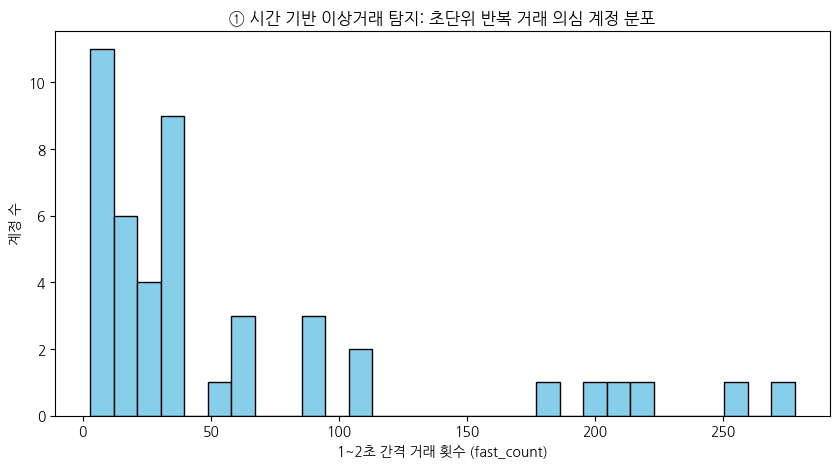

In [13]:
plt.figure(figsize=(10,5))
plt.hist(sus_all["fast_count"], bins=30, color='skyblue', edgecolor='black')
plt.title("① 시간 기반 이상거래 탐지: 초단위 반복 거래 의심 계정 분포")
plt.xlabel("1~2초 간격 거래 횟수 (fast_count)")
plt.ylabel("계정 수")
plt.show()


In [14]:
# 거래 금액 유사성 분석
# 동일 금액 반복 거래 계정 탐색
amount_repeat = (
    trade.groupby(["account_id", "amount"])
    .size()
    .reset_index(name="count")
)

# 동일 금액으로 5회 이상 거래한 계정만 추출
sus_amount = amount_repeat[amount_repeat["count"] >= 5]["account_id"].unique()
print(f"동일 금액(또는 수량)으로 5회 이상 거래한 계정 수: {len(sus_amount)}명")

# 의심 계정 리스트와 교집합 (시간 + 금액)
final_sus = sus_all[sus_all["account_id"].isin(sus_amount)]
print(f"시간 + 금액 기준 모두 만족하는 최종 의심 계정 수: {len(final_sus)}명")

display(final_sus)


동일 금액(또는 수량)으로 5회 이상 거래한 계정 수: 4명
시간 + 금액 기준 모두 만족하는 최종 의심 계정 수: 3명


,account_id,fast_count,cluster_id
11,A_4081f88bb0,37,0
16,A_59b90616d6,204,0
33,A_e8e9d04acc,207,0


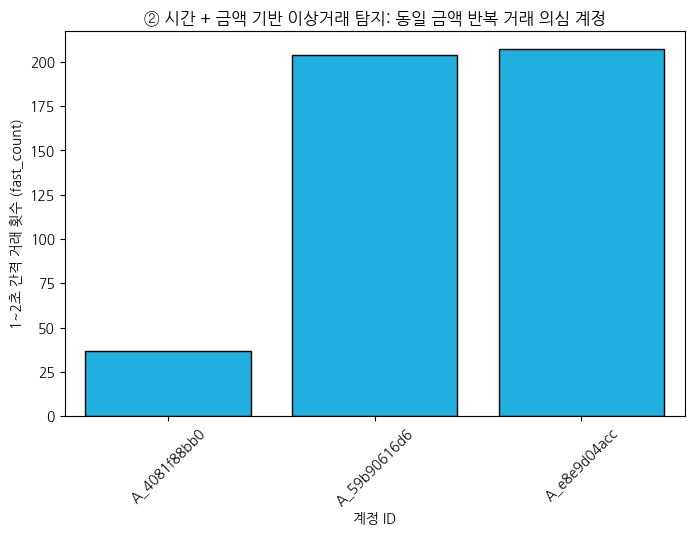

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x="account_id", y="fast_count", data=final_sus, color='deepskyblue', edgecolor='black')
plt.title("② 시간 + 금액 기반 이상거래 탐지: 동일 금액 반복 거래 의심 계정")
plt.xlabel("계정 ID")
plt.ylabel("1~2초 간격 거래 횟수 (fast_count)")
plt.xticks(rotation=45)
plt.show()


In [16]:
# 동일 코인(symbol) + 동일 금액 반복 거래 필터
symbol_repeat = (
    trade.groupby(["account_id", "symbol", "amount"])
    .size()
    .reset_index(name="count")
)

# 동일 코인에서 동일 금액으로 5회 이상 거래한 계정 추출
sus_symbol_amount = symbol_repeat[symbol_repeat["count"] >= 5]["account_id"].unique()
print(f"동일 코인(symbol) 내 동일 금액으로 5회 이상 거래한 계정 수: {len(sus_symbol_amount)}명")

# 시간 + 금액 + 코인 기준 교집합
final_sus_strict = final_sus[final_sus["account_id"].isin(sus_symbol_amount)]
print(f"시간 + 금액 + 코인 기준 모두 만족하는 최종 의심 계정 수: {len(final_sus_strict)}명")

display(final_sus_strict)


동일 코인(symbol) 내 동일 금액으로 5회 이상 거래한 계정 수: 4명
시간 + 금액 + 코인 기준 모두 만족하는 최종 의심 계정 수: 3명


,account_id,fast_count,cluster_id
11,A_4081f88bb0,37,0
16,A_59b90616d6,204,0
33,A_e8e9d04acc,207,0


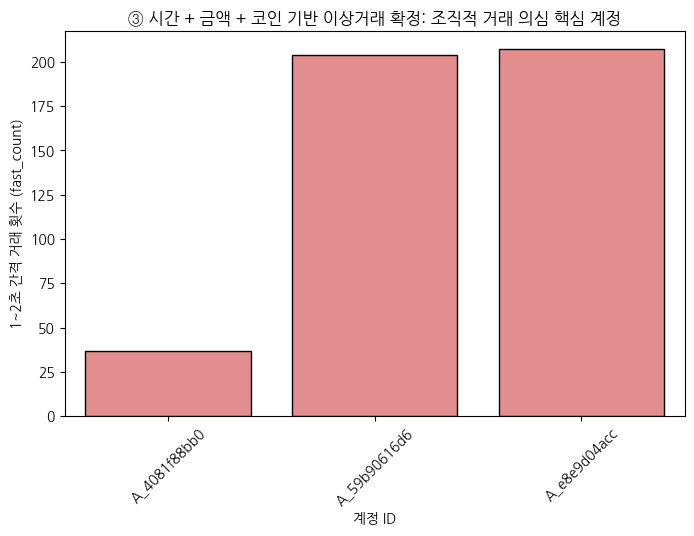

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="account_id", y="fast_count", data=final_sus_strict, color='lightcoral', edgecolor='black')
plt.title("③ 시간 + 금액 + 코인 기반 이상거래 확정: 조직적 거래 의심 핵심 계정")
plt.xlabel("계정 ID")
plt.ylabel("1~2초 간격 거래 횟수 (fast_count)")
plt.xticks(rotation=45)
plt.show()
